In [ ]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

There are labels for both favorable and unfavorable feelings toward movie reviews in the IMDB dataset.

During the construction of the dataset, each review is transformed into a collection of word embeddings, where each word is represented by a fixed-size vector.

In [ ]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences


A training sample of 100 sizes with a custom embedding layer

In [ ]:
# The number of words that should be considered as features
num_of_fea = 10000
# Remove the text after this number of words(from the top max_features most common words)
length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_of_fea)

x_train = x_train[:100]
y_train = y_train[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.
model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 687ms/step - acc: 0.5383 - loss: 0.6916 - val_acc: 0.3500 - val_loss: 0.6985
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9477 - loss: 0.6653 - val_acc: 0.4000 - val_loss: 0.6983
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9641 - loss: 0.6478 - val_acc: 0.4000 - val_loss: 0.6993
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9820 - loss: 0.6285 - val_acc: 0.4000 - val_loss: 0.6995
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9898 - loss: 0.6123 - val_acc: 0.4000 - val_loss: 0.7006
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9898 - loss: 0.5930 - val_acc: 0.4000 - val_loss: 0.7011
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9820 - loss: 0.5785 - val_acc: 0.4000 - val_loss: 0.7023
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9898 - loss: 0.5561 - val_acc: 0.4000 - val_loss: 0.7022
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9937 - loss: 0.5366 -

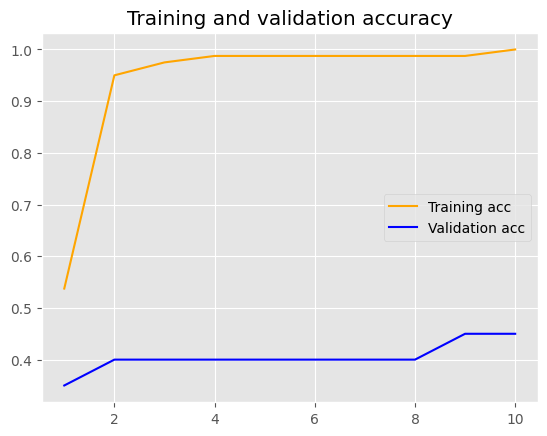

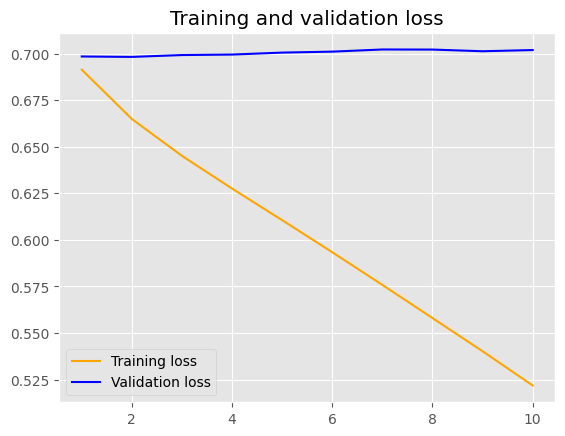

In [ ]:
import matplotlib.pyplot as plt

# Training accuracy
training_accu = history1.history["acc"]
# Validation accuracy
valid_accu = history1.history["val_acc"]
# Training loss
training_loss = history1.history["loss"]
# Validation loss
valid_loss = history1.history["val_loss"]


epochs = range(1, len(training_accu ) + 1)

plt.plot(epochs, training_accu , "orange", label = "Training acc")
plt.plot(epochs, valid_accu, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, training_loss, "orange", label = "Training loss")
plt.plot(epochs, valid_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5011 - loss: 0.6946
Test loss: 0.6953060030937195
Test accuracy: 0.4946799874305725


A custom trained embedding layer with a 5000 training sample size

In [ ]:
num_of_fea=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_of_fea)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:5000]
y_train = y_train[:5000]

In [ ]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - acc: 0.5027 - loss: 0.6932 - val_acc: 0.5400 - val_loss: 0.6903
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7361 - loss: 0.6701 - val_acc: 0.6610 - val_loss: 0.6612
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8025 - loss: 0.6034 - val_acc: 0.7100 - val_loss: 0.6001
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8632 - loss: 0.4837 - val_acc: 0.7620 - val_loss: 0.5222
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8979 - loss: 0.3731 - val_acc: 0.7980 - val_loss: 0.4689
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9196 - loss: 0.2980 - val_acc: 0.8130 - val_loss: 0.4314
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9388 - loss: 0.2355 - val_acc: 0.8180 - val_loss: 0.4188
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9612 - loss: 0.1856 - val_acc: 0.8120 - val_loss: 0.4136
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

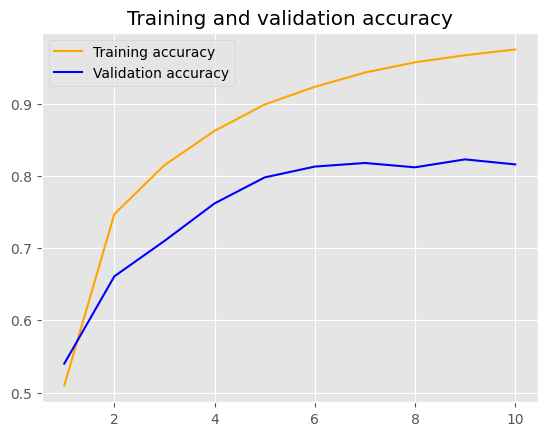

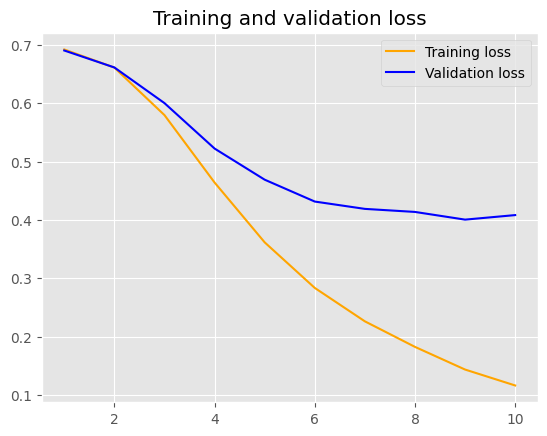

In [ ]:
training_accu2 = history2.history['acc']
valid_accur2 = history2.history['val_acc']
training_loss2 = history2.history['loss']
valid_loss2 = history2.history['val_loss']

epochs = range(1, len(training_accu2) + 1)

plt.plot(epochs, training_accu2, 'orange', label='Training accuracy')
plt.plot(epochs, valid_accur2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss2, 'orange', label='Training loss')
plt.plot(epochs, valid_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8285 - loss: 0.3876
Test loss: 0.38249093294143677
Test accuracy: 0.8284800052642822


A custom trained embedding layer with a 1000 training sample size

In [ ]:
num_of_fea=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_of_fea)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

In [ ]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.4916 - loss: 0.6935 - val_acc: 0.5200 - val_loss: 0.6931
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7899 - loss: 0.6751 - val_acc: 0.5300 - val_loss: 0.6917
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8968 - loss: 0.6576 - val_acc: 0.5500 - val_loss: 0.6900
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9505 - loss: 0.6376 - val_acc: 0.5800 - val_loss: 0.6877
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9581 - loss: 0.6090 - val_acc: 0.5850 - val_loss: 0.6850
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9709 - loss: 0.5742 - val_acc: 0.5900 - val_loss: 0.6814
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9710 - loss: 0.5394 - val_acc: 0.6050 - val_loss: 0.6767
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9699 - loss: 0.4977 - val_acc: 0.6150 - val_loss: 0.6717
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9779 - loss

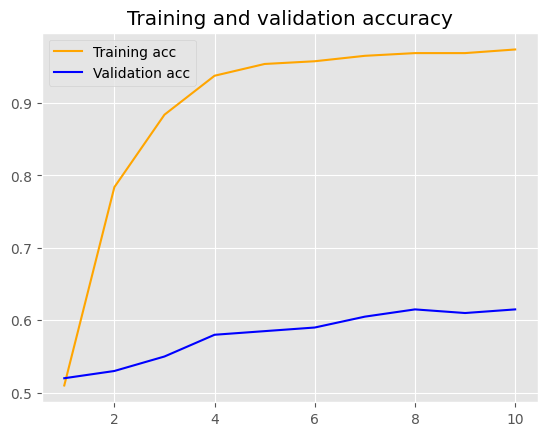

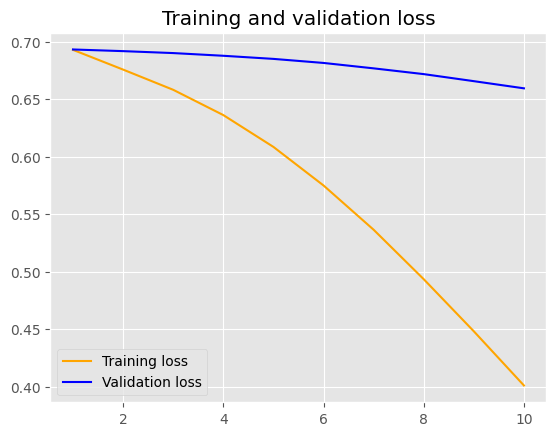

In [ ]:
training_accu3 = history3.history["acc"]
valid_accu3 = history3.history["val_acc"]
training_loss3 = history3.history["loss"]
valid_loss3 = history3.history["val_loss"]

epochs = range(1, len(training_accu3) + 1)

plt.plot(epochs, training_accu3, "orange", label = "Training acc")
plt.plot(epochs, valid_accu3, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, training_loss3, "orange", label = "Training loss")
plt.plot(epochs, valid_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5901 - loss: 0.6708
Test loss: 0.6715773940086365
Test accuracy: 0.5887200236320496


A custom trained embedding layer with 10,000 training samples

In [ ]:
num_of_fea=10000
length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_of_fea)

x_train = pad_sequences(x_train, maxlen=length)
x_test = pad_sequences(x_test, maxlen=length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]

In [ ]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.5264 - loss: 0.6921 - val_acc: 0.6045 - val_loss: 0.6791
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7615 - loss: 0.6393 - val_acc: 0.7950 - val_loss: 0.5329
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8451 - loss: 0.4595 - val_acc: 0.8400 - val_loss: 0.4038
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8902 - loss: 0.3292 - val_acc: 0.8600 - val_loss: 0.3482
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9126 - loss: 0.2568 - val_acc: 0.8630 - val_loss: 0.3273
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9319 - loss: 0.2105 - val_acc: 0.8670 - val_loss: 0.3152
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9533 - loss: 0.1693 - val_acc: 0.8635 - val_loss: 0.3148
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9624 - loss: 0.1381 - val_acc: 0.8505 - val_loss: 0.3438
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

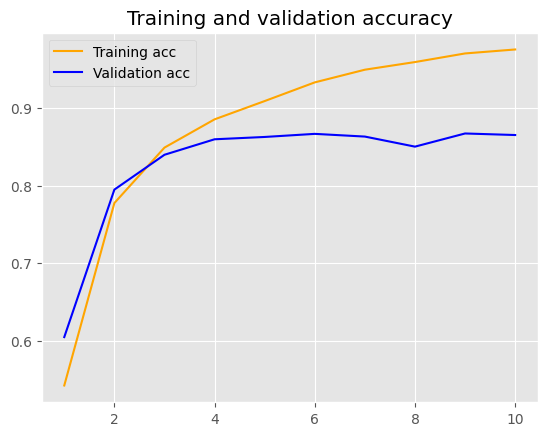

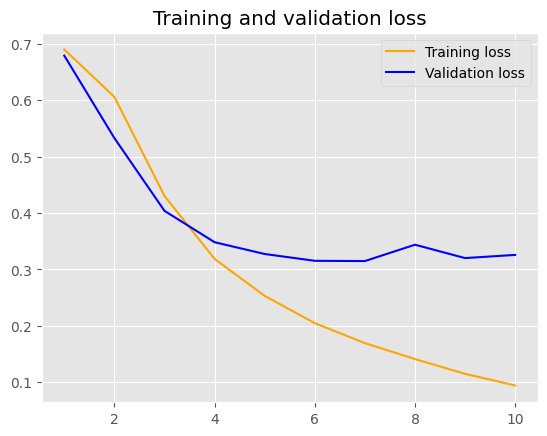

In [ ]:
training_accu4 = history4.history["acc"]
valid_accu4 = history4.history["val_acc"]
training_loss4 = history4.history["loss"]
valid_loss4 = history4.history["val_loss"]

epochs = range(1, len(training_accu4) + 1)

plt.plot(epochs, training_accu4, "orange", label = "Training acc")
plt.plot(epochs, valid_accu4, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, training_loss4, "orange", label = "Training loss")
plt.plot(epochs, valid_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8501 - loss: 0.3441
Test loss: 0.34021589159965515
Test accuracy: 0.8516799807548523


In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  2291k      0  0:00:35  0:00:35 --:--:-- 1410k


In [ ]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Using Trained Word Embeds If there is not enough training data to get word embeddings associated with the required solution, use pretrained word embeddings.





Tokenizing the data

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras.preprocessing.text
from tensorflow.keras.utils import pad_sequences # Import pad_sequences from tensorflow.keras.utils
from keras.utils import pad_sequences
import numpy as np

length2 = 150 # cut off review after 150 words
training_data = 100 # Training sample 100
validation_data = 10000 # Validation sample 10000
words = 10000 # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)
# Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_data] # (200, 100)
y_train = labels[:training_data] # shape (200,)
x_validation = data[training_data:training_data+validation_data] # shape (10000, 100)
y_validation = labels[training_data:training_data+validation_data] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Installing and setting up the GloVe word embedding

In [ ]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


We trained the 6B version of the GloVe model, which consists of 400,000 words and 6 billion tokens, using data from Wikipedia and Gigaword 5.


Setting up the matrix of GloVe word embeddings


training sample size of 100 for the pretrained word embedding layer

In [ ]:
emb_dim = 100

embedding_matrix = np.zeros((words, emb_dim ))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, emb_dim , input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Specify weights in the Embedding layer during creation
model.add(Embedding(words, emb_dim, input_length=length2, weights=[embedding_matrix], trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Pretrained word embedding is loaded into the Embeddig layer. Set this to False before running it to ensure that the Embedding layer cannot be trained. By setting trainable = True, the optimization process will be able to change the word embedding parameters. It is crucial to refrain from updating pretrained portions while students are still receiving training in order to prevent them from forgetting what they already "know,"

In [33]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model.save_weights('pre_trained_glove_model.weights.h5')

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step - acc: 1.0000 - loss: 0.0010 - val_acc: 0.5124 - val_loss: 2.0750
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - acc: 0.7466 - loss: 0.9827 - val_acc: 0.5172 - val_loss: 2.1477
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 1.0000 - loss: 0.0045 - val_acc: 0.5217 - val_loss: 1.7424
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - acc: 1.0000 - loss: 0.0022 - val_acc: 0.5269 - val_loss: 1.6232
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - acc: 1.0000 - loss: 0.0010 - val_acc: 0.5369 - val_loss: 1.2936
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 434ms/step - acc: 1.0000 - loss: 5.7309e-04 - val_acc: 0.5380 - val_loss: 1.2671
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - acc: 1.0000 - loss: 5.5675e-04 - val_acc: 0.5400 - val_loss: 1.2387
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - acc: 1.0000 - loss: 5.0147e-04 - val_acc: 0.5410 - val_loss: 1.1643
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - acc: 1.0

Given the limited amount of training data, this rapid overfitting of the model is to be expected. The wide variance in validation accuracy can be explained by the same mechanism.

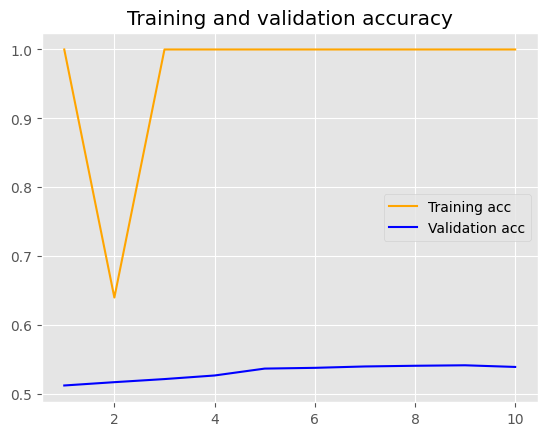

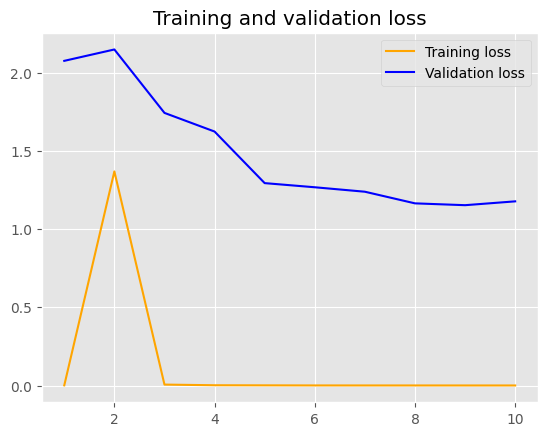

In [34]:
import matplotlib.pyplot as plt

training_accu = history.history['acc']
valid_accu = history.history['val_acc']
training_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(training_accu) + 1)

plt.plot(epochs, training_accu, 'orange', label='Training acc')
plt.plot(epochs, valid_accu, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss, 'orange', label='Training loss')
plt.plot(epochs, valid_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.4931 - loss: 1.3691
Test loss: 1.3527542352676392
Test accuracy: 0.5007200241088867


pretrained word embedding layer with training sample size = 5000

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.5079 - loss: 1.1181 - val_acc: 0.5012 - val_loss: 0.6932
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5037 - loss: 0.7086 - val_acc: 0.5023 - val_loss: 0.6942
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5430 - loss: 0.6859 - val_acc: 0.5013 - val_loss: 0.7962
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6115 - loss: 0.6460 - val_acc: 0.5044 - val_loss: 0.7577
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7151 - loss: 0.5555 - val_acc: 0.5054 - val_loss: 0.8648
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7961 - loss: 0.4504 - val_acc: 0.5104 - val_loss: 0.8526
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8559 - loss: 0.3482 - val_acc: 0.5039 - val_loss: 0.9930
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8954 - loss: 0.2721 - val_acc: 0.5078 - val_loss: 1.0628
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - a

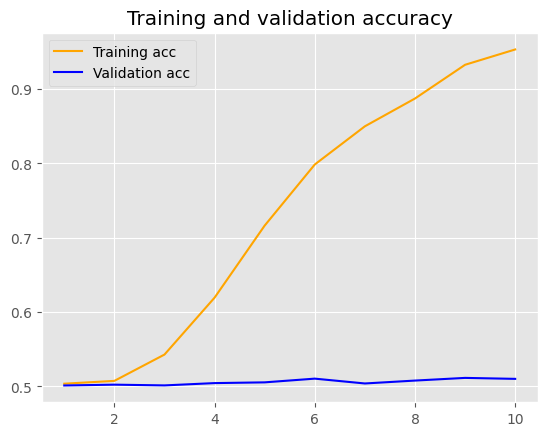

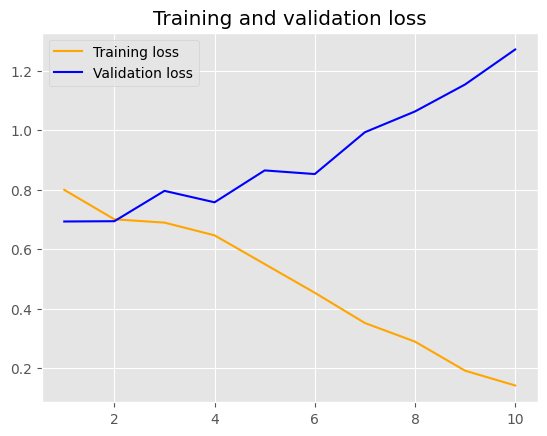

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer #import to get the tokeniser from the tensorflow package
from tensorflow.keras.utils import pad_sequences # import to get pad_sequences from the tensorflow package
import numpy as np

length2 = 150
training_data = 5000 # Training sample is 5000
validation_data = 10000
words = 10000

tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_data]
y_train = labels[:training_data]
x_validation = data[training_data:training_data+validation_data]
y_validation = labels[training_data:training_data+validation_data]
embedd_di = 100

embedd_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from tensorflow.keras.models import Sequential # import to get Sequential model from the tensorflow package
from tensorflow.keras.layers import Embedding, Flatten, Dense #import to get the layers from the tensorflow package

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=length2,weights=[embedd_matrix],trainable=False))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history11 = model11.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model11.save_weights('pre_trained_glove_model.weights.h5')
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'orange', label='Training acc')
plt.plot(epochs, valid_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'orange', label='Training loss')
plt.plot(epochs, valid_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4925 - loss: 1.2904
Test loss: 1.2983671426773071
Test accuracy: 0.4965200126171112


pretrained word embedding layer with training sample size = 1000

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - acc: 0.4749 - loss: 1.7279 - val_acc: 0.4997 - val_loss: 0.8036
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.6236 - loss: 0.7610 - val_acc: 0.5009 - val_loss: 0.7914
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.6579 - loss: 0.5858 - val_acc: 0.5005 - val_loss: 0.7078
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8247 - loss: 0.4898 - val_acc: 0.5009 - val_loss: 0.9043
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8417 - loss: 0.3820 - val_acc: 0.5019 - val_loss: 0.8736
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9191 - loss: 0.2843 - val_acc: 0.5053 - val_loss: 0.8053
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9656 - loss: 0.1979 - val_acc: 0.5034 - val_loss: 0.8544
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9505 - loss: 0.1862 - val_acc: 0.4984 - val_loss: 1.1703
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9888

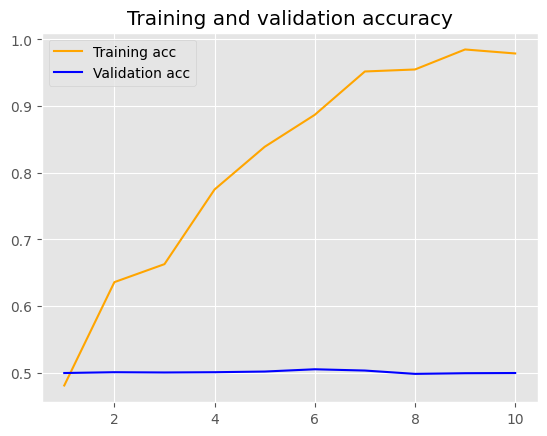

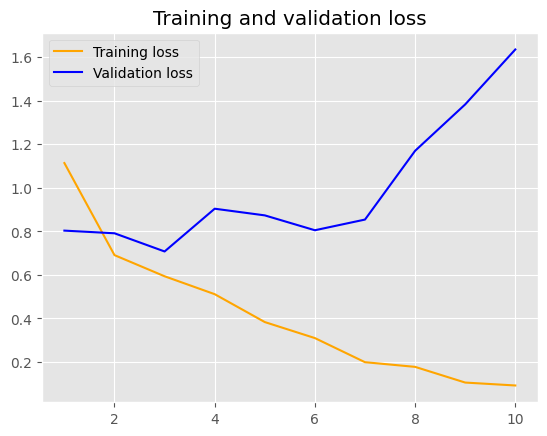

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

length = 150
training_data = 1000 #Trains on 1000 samples
validation_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_data]
y_train = labels[:training_data]
x_val = data[training_data:training_data+validation_data]
y_val = labels[training_data:training_data+validation_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length, weights=[embedd_matrix], trainable=False))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history12 = model12.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model12.save_weights('pre_trained_glove_model.weights.h5')
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'orange', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'orange', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5087 - loss: 1.6165
Test loss: 1.6390999555587769
Test accuracy: 0.5024399757385254


pretrained word embedding layer with training sample size = 10000

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.4876 - loss: 0.9324 - val_acc: 0.4972 - val_loss: 0.6932
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.5120 - loss: 0.6948 - val_acc: 0.4971 - val_loss: 0.6935
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.5228 - loss: 0.6945 - val_acc: 0.5041 - val_loss: 0.6956
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.5691 - loss: 0.6790 - val_acc: 0.4977 - val_loss: 0.7152
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.6306 - loss: 0.6447 - val_acc: 0.4943 - val_loss: 0.7326
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.6978 - loss: 0.5879 - val_acc: 0.5031 - val_loss: 0.8416
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.7561 - loss: 0.5025 - val_acc: 0.4989 - val_loss: 0.9899
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8125 - loss: 0.4063 - val_acc: 0.4926 - val_loss: 0.9250
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - ac

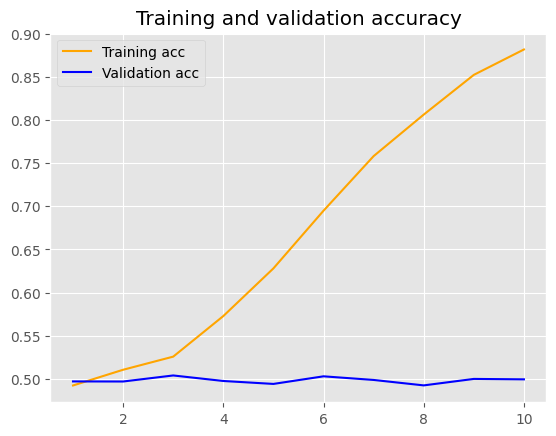

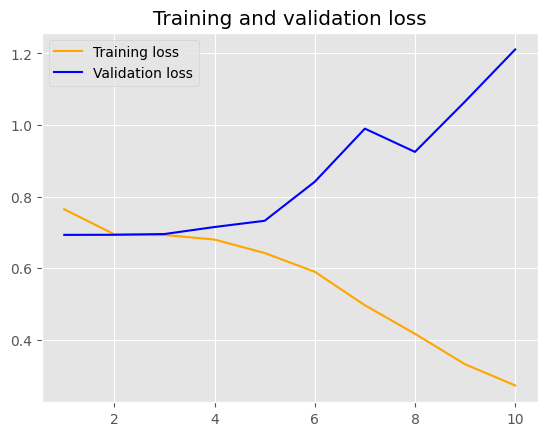

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

length = 150
training_ds = 10000 # Trains on 10000 samples
validation_ds = 10000
words = 10000

tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_ds]
y_train = labels[:training_ds]
x_val = data[training_ds:training_ds+validation_ds]
y_val = labels[training_ds:training_ds+validation_ds]
embedd_dim = 100

embedd_matrix = np.zeros((words, embedd_dim)) #removed input_length
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            embedd_matrix[i] = embedd_vector

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model13 = Sequential()
model13.add(Embedding(words, embedd_dim, input_length=length, weights=[embedd_matrix], trainable=False))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history13 = model13.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model13.save_weights('pre_trained_glove_model.weights.h5')
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'orange', label='Training acc')
plt.plot(epochs, valid_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'orange', label='Training loss')
plt.plot(epochs, valid_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.4958 - loss: 1.2085
Test loss: 1.2027091979980469
Test accuracy: 0.4970400035381317
